In [1]:
#importing library 
import numpy as np
import pandas as pd

# for visualization purpose
import seaborn as sns
import matplotlib.pyplot as plt

# for preprocessing purpose
from sklearn.preprocessing import StandardScaler

# for doing PCA
from sklearn import decomposition

# # for t-SNE implemention 
# from sklearn.manifold import TSNE

In [2]:
# importing the dataset  
data_image = pd.read_csv('train.csv')

# saving all the label in to variable "labels"
labels = data_image['label']

# saving the pixel data in to "image_vec" variable
image_vec = data_image.drop('label',axis=1)

data_image.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


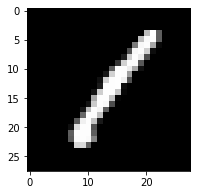

**************************************************
1
**************************************************


In [3]:
# let's look at the first image in the dataset "image_vec" and its respective label in the dataset "labels"
# we can change the below variable "no" to see other images
no = 0 
plt.figure(figsize = (3,3))
grid_data = image_vec.iloc[no].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation = 'none', cmap='gray')
plt.show()
print(50*"*")
print(labels[no])
print(50*"*")

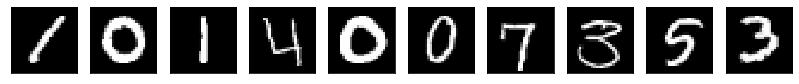

In [4]:
## First 10 images in the dataset
plt.figure(figsize=(14,14))
for digit_num in range(0,10):
    plt.subplot(1,10,digit_num+1)
    grid_data = image_vec.iloc[digit_num].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "gray")
    plt.xticks([])
    plt.yticks([])
plt.show()

In [5]:
# before going forward let's standardize the data with mean zero and variance one

standardized_data = StandardScaler().fit_transform(image_vec)
print(standardized_data.shape)  

(42000, 784)


In [6]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

covariance_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covariance_matrix.shape)


The shape of variance matrix =  (784, 784)


In [7]:
from scipy.linalg import eigh 
 
# eigh function will return the eigen values in asending order
# taking top 2 eigenvalues and eigenvectors.
values, vectors = eigh(covariance_matrix, eigvals=(782,783))

print('Largest eigen value is {}'.format(values[1]))
print('Second largest eigen is {}'.format(values[0]))

Largest eigen value is 1709211.4108257475
Second largest eigen is 1222652.4461378632


In [8]:
# projecting the original data points on the plane 
# formed by two principal eigen vectors.

new_coordinates = np.matmul(vectors.T, sample_data.T)

print (" resultanat new data point's shape is  ", vectors.T.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data point's shape is   (2, 784) X (784, 42000)  =  (2, 42000)


In [9]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("2nd_principal", "1st_principal", "label"))
print(dataframe.head())

   2nd_principal  1st_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


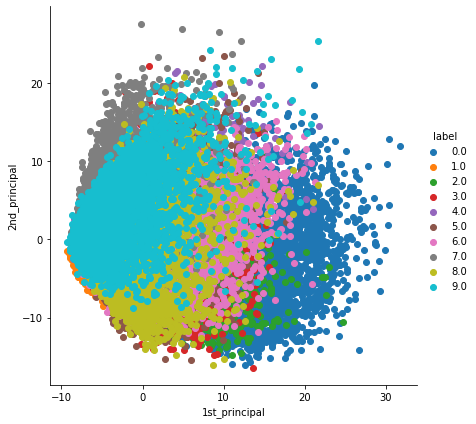

In [10]:
# ploting the 2d data points with seaborn
sns.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [11]:
### PCA with sklearn 
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_data will contain the 2-d projects of sample data on the top 2 eigen vector direction
print("shape of pca_data.shape = ", pca_data.shape)

shape of pca_data.shape =  (42000, 2)


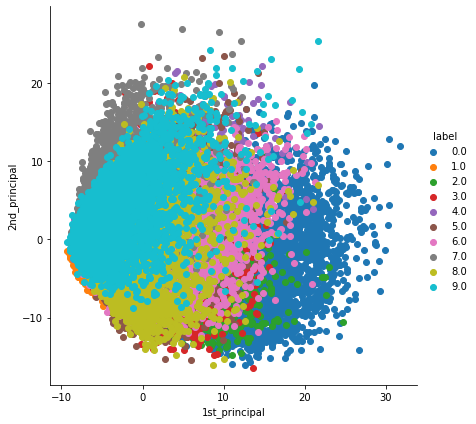

In [12]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()